# Project 2: Numerical Integration of Differential Equations 
## The Damped Harmonic Oscillator

Date: 21/02/2023
 
Author: 10916086

Aim: Study forced spring-mass system
    
    mx" + bx' + kx = F(t)

1. Explore the analytial solutions for some F(t)
2. Explore the accuracy of different numerical algorithms by comparison with analytical solutions and to each other

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import cmath

## Objective 1

Write all four proposed numerical methods as functions (Euler, improved Euler, Verlet and Euler-Cromer)

Assumption for now:
1. No external forces (F=0)
2. Initial condition, x0 = 0 m and x'0 = -1 m/s

Defining all the integration methods as a function 


In [2]:
#Integration function using Euler Method
def Euler_Method(int_conditions, nsteps, steps):
    #int_conditions: Array containing the values (float) of initial conditions of x and v
    #int_conditions = [initial x (m), initial v (m/s)]
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = int_conditions[0]
    v[0] = int_conditions[1]
    
    #Calculate the value of all x and v
    for h in range(nsteps-1):
        # Calculate the acceleration at step h (in m/s)
        a = -(k/m) * x[h] - (b/m) * v[h]
        # For each configuration at step h, calculate x (in m) and v (in m/s) for the later step h+1
        x[h+1] = x[h] + v[h] * steps
        v[h+1] = v[h] + a * steps
    
    return (x, v)

#Integration function using the improved Euler Method (Higher accuracy)
def improvedEuler_Method(int_condition, nsteps, steps):
    #int_conditions: Array containing the values (float) of initial conditions of x and v
    #int_conditions = [initial x (m), initial v (m/s)]
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = int_condition[0]
    v[0] = int_condition[1]
    
    #Calculate the value of all x and v
    for h in range(nsteps-1):
        # Calculate the acceleration at step h (in m/s)
        a = -(k/m) * x[h] - (b/m) * v[h]
        # For each configuration at step h, calculate x (in m) and v (in m/s) for the later step h+1
        x[h+1] = x[h] + v[h] * steps + (steps**2/2) * (a)
        v[h+1] = v[h] + a * steps
    
    return (x, v)

#Integration function using the Verlet's Method
def Verlets_Method(int_condition, nsteps, steps):
    #int_conditions: Array containing the values (float) of initial conditions of x and v
    #int_conditions = [initial x (m), initial v (m/s)]
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = int_condition[0]
    
    #Calculate the x[1] using other method 
    #verlets_function: variable that stores the starting method function 
    (x1, v1) = verlets_function(int_condition, 2, steps)
    """
    Verlets_function: Global variable that stores which method function (Euler, improve Euler, Euler-Cromer) 
    to use to calculate the x[i] function
    """
    
    x[1] = x1[1]
    v[0] = int_condition[1]
    
    D = 2 * m + b * steps
    A = (2/D) * (2 * m - k * steps**2)
    B = (b * steps - 2 * m) / D
    
    #Calculate the value of all x and v
    for h in np.arange(1, nsteps-1):
        # For each configuration at step h, calculate x (in m) the later step h+1
        x[h+1] = A * x[h] + B * x[h-1]
    
    for h in np.arange(1, nsteps-2):
        # For each configuration at step h, calculate v (in m/s) the step h
        v[h] = (x[h+1] - x[h-1]) / (2*steps)
    
    return (x, v)

#Integration function using the Euler-Cromer Method
def EulerCromer_Method(int_condition, nsteps, steps):
    #int_conditions: Array containing the values (float) of initial conditions of x and v
    #int_conditions = [initial x (m), initial v (m/s)]
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = int_condition[0]
    v[0] = int_condition[1]
    
    #Calculate the value of all x and v
    for h in range(nsteps-1):
        # For each configuration at step h, calculate x (in m) and v (in m/s) for the later step h+1
        v[h+1] = v[h] - x[h] * ((steps * k) / m)
        x[h+1] = x[h] + v[h+1] * steps
    
    return (x, v)

# The analytic solution when b is not b_cr (critical b)
def Analytic(int_condition, time_limit):
    # Constants
    x0 = int_condition[0]
    v0 = int_condition[1]
    A = (b / (2*1j*cmath.sqrt(4*k*m-b**2)) + 1/2)*x0 + (v0*m) / (cmath.sqrt(4*k*m - b**2) * 1j) 
    B = x0-A
    
    x = np.exp(-b *time_limit/(2*m)) * (A * np.exp(1j*cmath.sqrt(4*k*m - b**2) * time_limit / (2*m))
                              + B * np.exp(-1j*cmath.sqrt(4*k*m - b**2) * time_limit / (2*m)))

    return x

# The analytic solution when b is equal to b_cr (critical b)
def analytic_critical(int_condition, time_limit):
    A = int_condition[0]
    B = int_condition[1]  + (int_condition[0] * b_cr) / (2 * m)
    
    return (A + B*time_limit) * np.exp((-b_cr * time_limit) / (2 * m))



When no driving force applied, 

The exact solution for the system when it is overdamped or underdamped (Analytic function):

x(t) = exp(-gamma t / 2) * [Aexp(iwt) + Bexp(-iwt)]

where,
1. Angular frequency, w = sqrt(w0^2 - gamma^2 / 4)
2. Natural angular frequency, w0 = sqrt(k/m)
3. gamma = b/m
4. A and B are constants determined by initial conditions

The exact solution for the system when it is critcally damped (analytic_critical function):

x(t) = (x0 + Ct) * exp(-bt/2m)

where,
1. C = v0 + x0 * b / 2m 

P.S. Verlet method is not a self-staring method. It requires other method to calculate the x[1] term (thus, the calculation using this verlet starts from x[2]). 

## Objective 2

Plot results using different methods and varying the value of h to show clearly the differences between the four methods and with the analytical solution

Setting up parameters, initial conditions and time limit

In [3]:
#Parameters
m = 2.37 #in kg
k = 0.95 #in kg/s**2
b = 0.08 #in kg/s
b_cr = 2 * sqrt(k*m) #in kg/s

#int_condition: Array containing the initial values (float) of x and v
#int_condition = [Initial x (m), initial v (m/s)]
int_condition = [0, -1]

# Time for integration (in s)
T = 150


Plotting a graph of x vs. t using different step value (h) and using different integration methods

Comparing it with the analytical values to find the best h value to use

Integration methods used are Euler's method, improved Euler's method, Verlet's method and Euler-Cromer method

In [4]:
# Choose a range of step sizes (in s)
h = [0.005, 0.01, 0.05, 0.1]

#Define a function to plot the graph of x vs. t using different h values 
def plot_hstep(function, int_condition, steps, title):
    # tweeking the figure size
    plt.rcParams["figure.figsize"] = (8,5)
    plt.figure()
    
    # Finding the solution for a range of step sizes 
    for hstep in steps: 
        nsteps = int(T/hstep)
        # call the iterative method 
        (x, v) = function(int_condition, nsteps, hstep)
        # plot the outcome by displaying the position only 
        plt.plot(np.arange(0, T, hstep), x, label='h: {:3.3f}'.format(hstep))
    # plot the analytic solution
    plt.plot(np.arange(0,T,hstep), Analytic(int_condition, np.arange(0,T,hstep)).real, 'k--', label='Analytic solution')

    # labeling plot and title
    plt.title(title)
    plt.xlabel("t (s)")
    plt.ylabel("x (mm)")
    plt.legend()

    # setting the range displayed and the position of the legend box
    plt.xlim(0, T)
    plt.ylim(-3, 3)
    plt.legend(loc=1, bbox_to_anchor=(0.3,1))

    plt.show()




The system experience light damping since damping constant, b = 0.08 kg/s (< b_cr). Thus, the solutions should show that the system is oscillating with decreasing amplitude overtime until it returns to its equilibrium point. 

#### Euler's Method

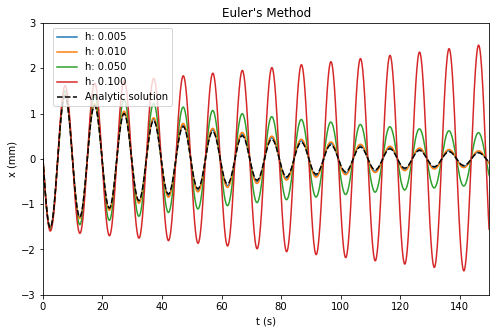

In [5]:
#Euler method
plot_hstep(Euler_Method, int_condition, h, 'Euler\'s Method')


This shows that the smaller the value of h, the more accurate this method will be 

For this range of values of h, h = 0.005 gives the highest accuracy


#### Improved Euler method

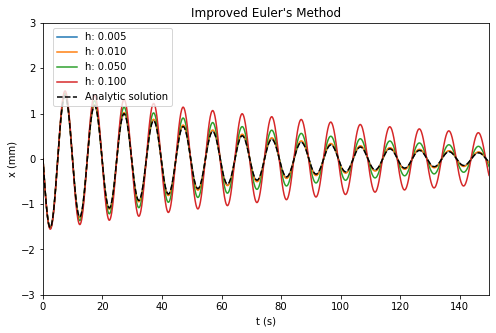

In [6]:
#Improved Euler method
plot_hstep(improvedEuler_Method, int_condition, h, 'Improved Euler\'s Method')


Similar to previous method, the smaller the value of h, the more accurate this method will be 

For this range of values of h, h = 0.005 gives the highest accuracy

Improved Euler method is way more accurate than Euler method because it has smaller truncation errors (The Taylor expansion is truncated from h to the power of three instead of to the power of two in Euler method). 


#### Euler-Cromer method

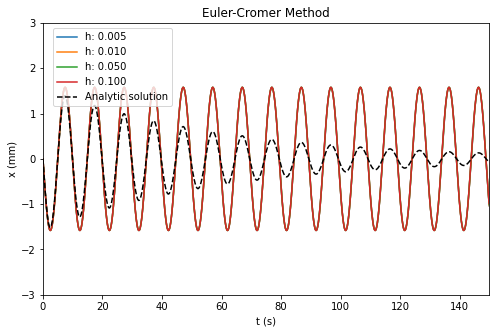

In [7]:
#Euler-Cromer method
plot_hstep(EulerCromer_Method, int_condition, h, 'Euler-Cromer Method')


For Euler-Cromer method, any value of h results in the same graph 

As can be seen the results do not agree with the analytical solution for damped oscillation

#### Verlet's method

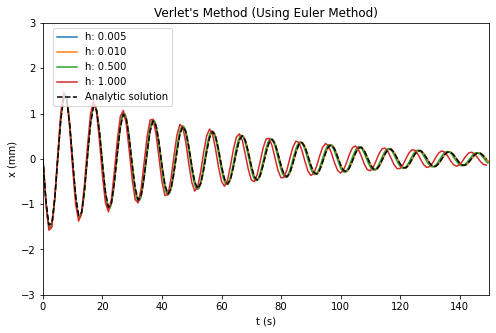

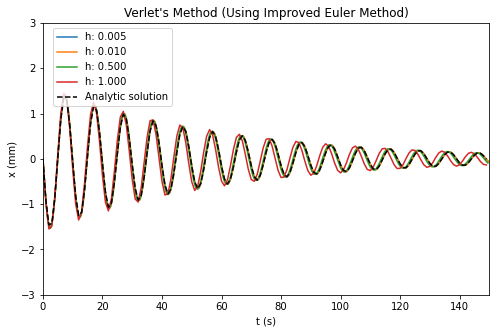

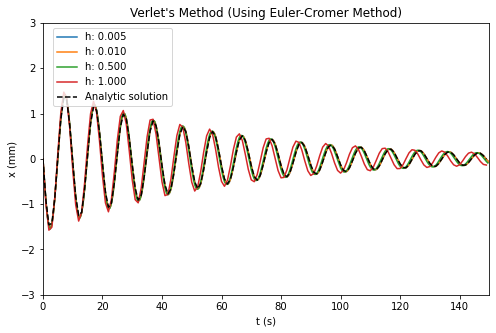

In [8]:
#Verlet's method

#Function array containing all the method function
Function = [Euler_Method, improvedEuler_Method, EulerCromer_Method]

#New range of h for this method
h = [0.005, 0.01, 0.5, 1]

for verlets_function in Function:
    if verlets_function == Euler_Method:
        plot_hstep(Verlets_Method, int_condition, h, 'Verlet\'s Method (Using Euler Method)')
    if verlets_function == improvedEuler_Method:
        plot_hstep(Verlets_Method, int_condition, h, 'Verlet\'s Method (Using Improved Euler Method)')
    if verlets_function == EulerCromer_Method:
        plot_hstep(Verlets_Method, int_condition, h, 'Verlet\'s Method (Using Euler-Cromer Method)')



Since Verlet's Method is not a self-starting method, it is important to test the accuracy of verlets method using the other methods to start it. This means that the accuracy of the starting method would also affects the accuracy of Verlets method. 

As seen from the plots above, for Verlet method, the smaller the value of h, the more accurate the numerical solutions will be.

Furthermore, by using Euler or improved Euler method, the results tend to be smaller than the analytical solutions. By using Euler-Cromer method, the results tend to be bigger than the analytical solutions. 

However, from the plots, using Euler-Cromer method to start results in the least accurate solutions. Therefore, from this point forward, improved Euler Method will be used to start the Verlets method since it is more accurate compared to the original Euler method as well.


#### Sub-objective

Further testing the accuracy of the different integration methods by varying the value of b and fixing the value of h 



Create functions to plot graph comparing analytical and numerical solutions using various methods 

Graphs plotted are for when damping is present and also when there is no damping

In [9]:
#There is damping
# A range of b values
B = [0, 0.001, 0.1, 0.5, 1] #kg/s 
#Time step (The mose accurate h value as shown above)
#Value of H cannot be too small to prevent round-off errors
H = 0.0001
# Determine how many steps there are (values of i)
nsteps = int(T/H)
#Starting method of Verlets method
verlets_function = improvedEuler_Method

#Function to plot the results of the numerical solutions as compared to the analytic solutions
def plot_damping(method_function, analytic_function, title):
    # call the iterative method 
    (x, v) = method_function(int_condition, nsteps, H)
    # plot the outcome by displaying the position only 
    plt.plot(np.arange(0,T,H), x, label='b = {:3.3f}'.format(b))
        
    # plot the analytic solution
    plt.plot(np.arange(0,T,H), analytic_function(int_condition, np.arange(0,T,H)).real, 'k--', label='Analytical solution')
    
    # labeling plot and title
    plt.title(title)
    plt.xlabel("t (s)")
    plt.ylabel("x (m)")
    plt.legend(loc=1, bbox_to_anchor=(0.3,1), title='b_cr = {:3.3f}'.format(b_cr))
    
    # setting the range displayed and the position of the legend box
    plt.xlim(0, T)
    plt.ylim(-3, 3)

    plt.show()



Plot graph comparing the analytical and numerical solutions for different numerical methods for a range of b and fixed h

Necessary to test how accurate the method is for a range of b values 



#### Euler method 

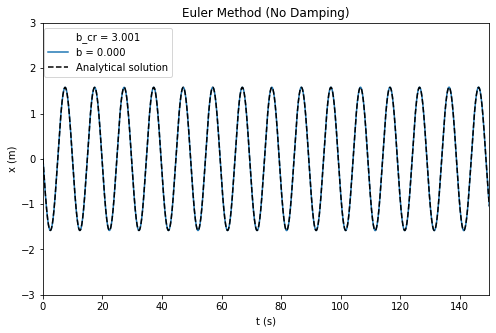

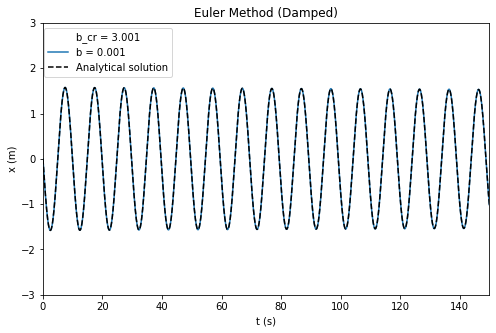

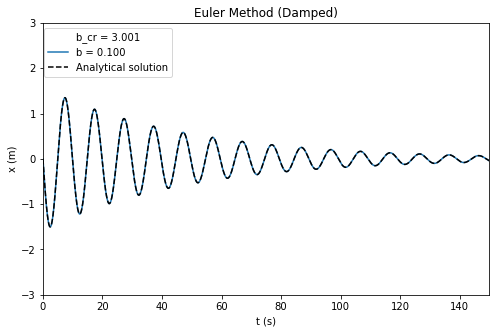

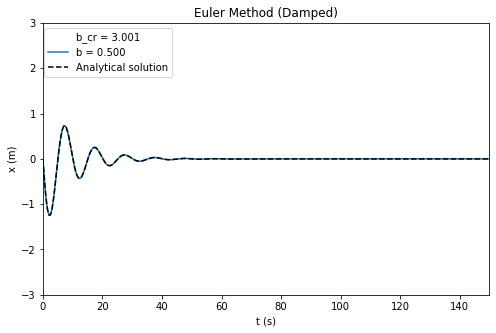

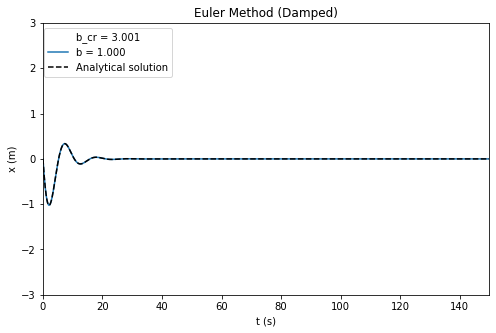

In [10]:
#title of the graph 
title = 'Euler Method'

#function variable to conveniently change the numerical method used in the graph 
function = Euler_Method

#Create a loop to plot the graph comparing analytical and numerical solutions for a range of B
for b in B:
    #No damping
    if b == 0: 
        plot_damping(function, Analytic, title + ' (No Damping)')
        
    #With damping
    else:    
        plot_damping(function, Analytic, title + ' (Damped)')


As seen above Euler method is quite accurate as it gives out similar solutions to the analytical solutions. However, it works better with bigger damping constant,b. This can be seen from the first two plots where Euler method start to diverge away from the analytical solution by getting bigger and bigger. 

#### Improved Euler Method 

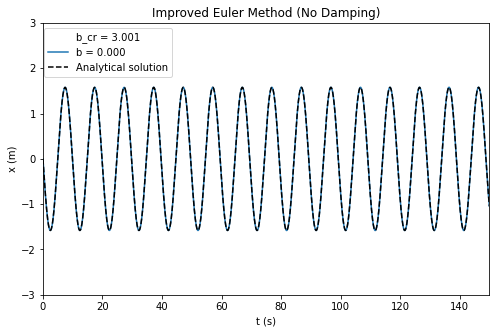

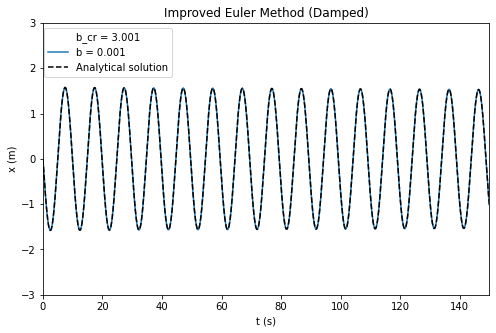

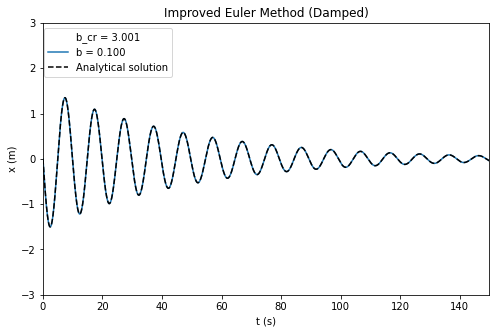

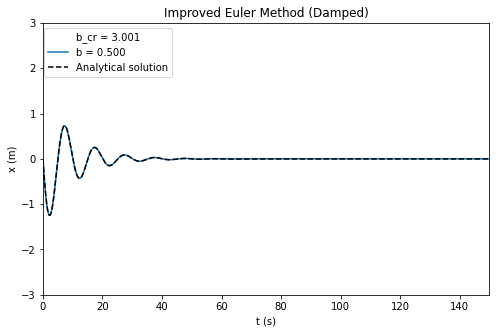

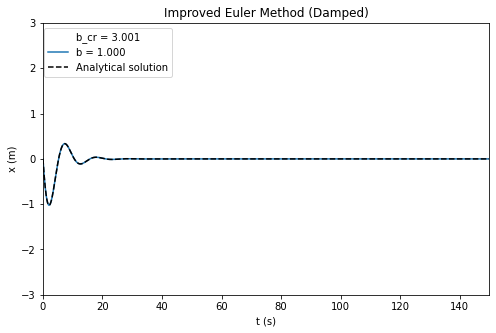

In [11]:
#title of the graph 
title = 'Improved Euler Method'

#function variable to conveniently change the numerical method used in the graph 
function = improvedEuler_Method

#Create a loop to plot the graph comparing analytical and numerical solutions for a range of B
for b in B:
    #No damping
    if b == 0: 
        plot_damping(function, Analytic, title + ' (No Damping)')
        
    #With damping
    else:    
        plot_damping(function, Analytic, title + ' (Damped)')

Improved Euler method is more accurate compared to Euler method as it gives out a better solutions closer to the analytical solutions. However, it also works better with bigger damping constant,b. This can be seen from the first two plots where improved Euler method start to diverge away from the analytical solution by getting bigger and bigger. 

#### Euler-Cromer 

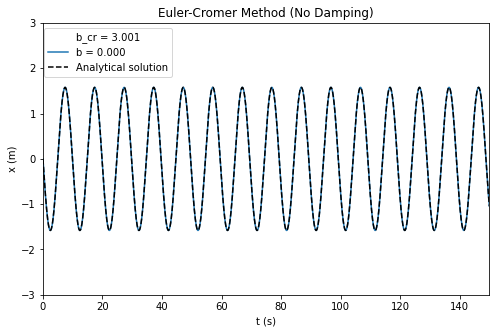

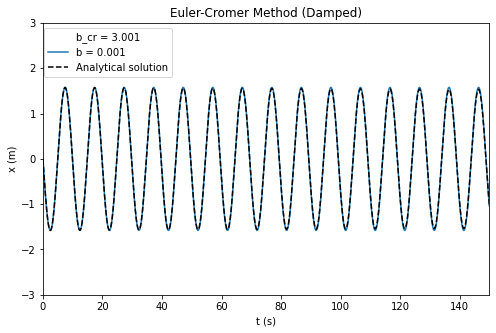

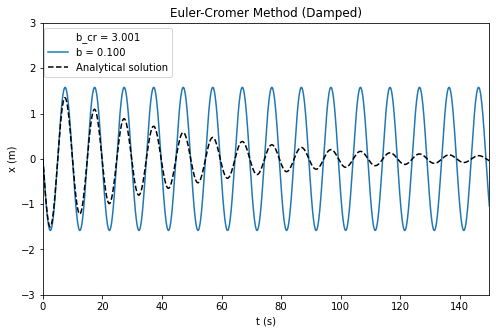

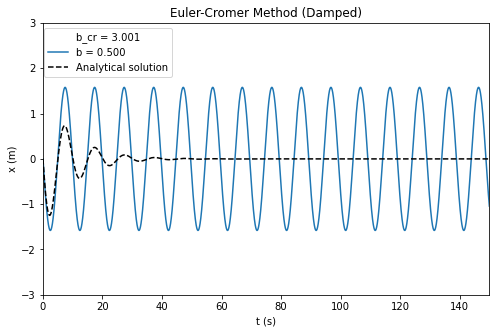

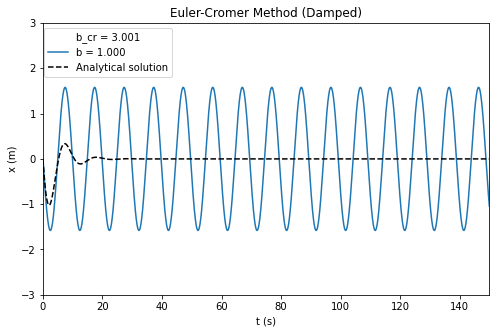

In [12]:
#title of the graph 
title = 'Euler-Cromer Method'

#function variable to conveniently change the numerical method used in the graph 
function = EulerCromer_Method

#Create a loop to plot the graph comparing analytical and numerical solutions for a range of B
for b in B:
    #No damping
    if b == 0: 
        plot_damping(function, Analytic, title + ' (No Damping)')
        
    #With damping
    else:    
        plot_damping(function, Analytic, title + ' (Damped)')

As seen from the plots, Euler-Cromer method works best for small damping or no damping calculations. This method gives out 'constant' solutions, thus, for higher, b value, the solutions became less and less accurate.

#### Verlet Method 

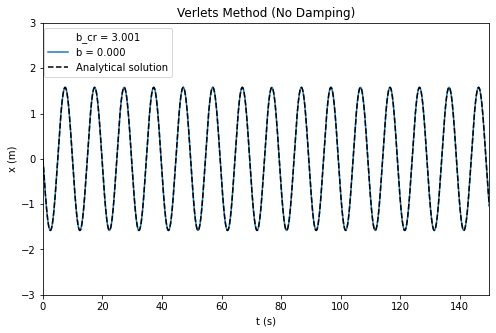

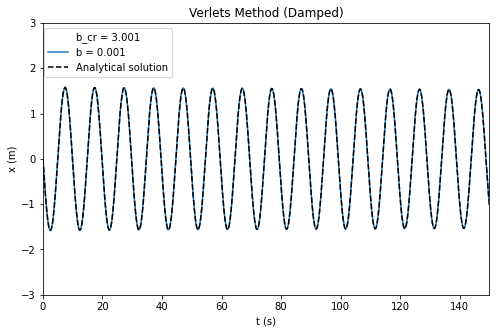

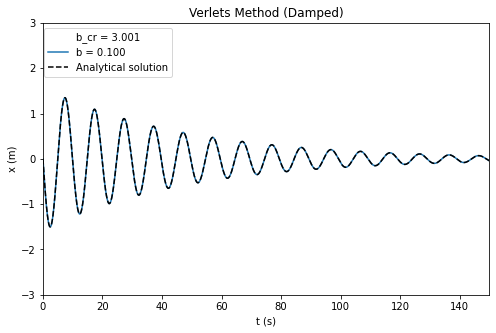

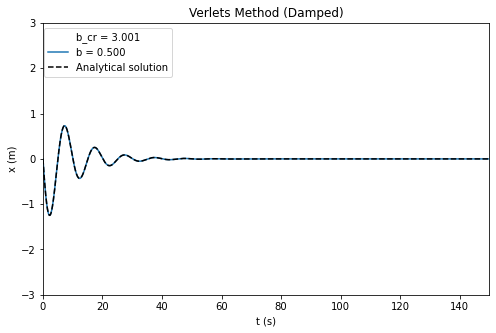

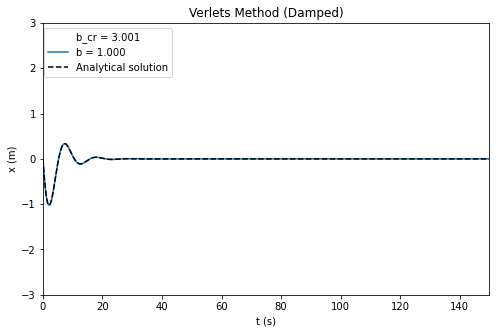

In [13]:
#title of the graph 
title = 'Verlets Method'

#function variable to conveniently change the numerical method used in the graph 
function = Verlets_Method

#Create a loop to plot the graph comparing analytical and numerical solutions for a range of B
for b in B:
    #No damping
    if b == 0: 
        plot_damping(function, Analytic, title + ' (No Damping)')
        
    #With damping
    else:    
        plot_damping(function, Analytic, title + ' (Damped)')

Verlets method seems to give out the most accurate solutions as the results is almost exactly equal to the analytical solutions. 

## Objective 3

Investigate the effect of the choice of time step h on the accuracy of the different methods by plotting the graph of energy against time

Setting new parameters and defining functions to plot these graphs

Assumption: No damping 

For a system experiencing no damping, the energy of the system should remain constant since

Total energy = Potential energy + Kinetic energy = 1/2 * (kx^2 + mv^2)

In [14]:
#Analytical energy for no damping (b=0) remains constant 
analytical_energy = (k * int_condition[0]**2 + m * int_condition[1]**2) / 2 #J

#No damping
b = 0

#Function to calculate the energy of the system using different numerical methods
def Numerical_Energy(function, nsteps, hsteps):
    (x, v) = function(int_condition, nsteps, hsteps)
    return 0.5 * (k * x**2 + m * v**2) 

#Function to plot the graph of energy against time for different numerical methods
def plot_energy(method_function, title):
    for H in h:
        nsteps = int(T/H)
        # plot the energy calculated using numerical method 
        plt.plot(np.arange(0,T,H), Numerical_Energy(method_function, nsteps, H), label='h={:3.3f}'.format(H))
        
    # plot the analytic solution
    plt.axhline(y = analytical_energy, color = 'b', linestyle = '--', label='Analytical Method')

    # labeling plot and title
    plt.title(title)
    plt.xlabel("t (s)")
    plt.ylabel("Energy (J)")
    plt.legend()

    # setting the range displayed 
    plt.xlim(0, T)

    plt.show()
    

Plot the graph of energy against time using a range of h values

This graph is compared to the analytical solution

#### Euler method 

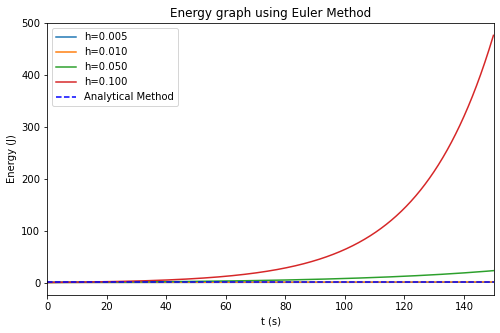

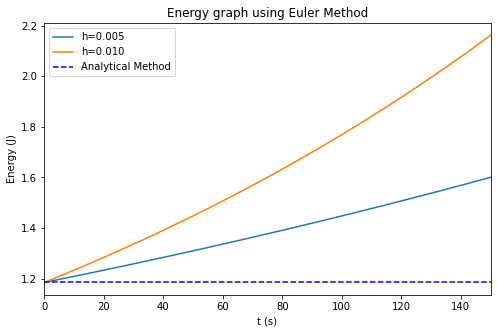

In [15]:
#title of the graph 
title = 'Euler Method'

#function variable to conveniently change the numerical method used in the graph 
function = Euler_Method

#A range of time step h
h = [0.005, 0.01, 0.05, 0.1]
plot_energy(function, 'Energy graph using ' + title)

#Plot graphs for smaller h values (To see it in more detail)
h = [0.005, 0.01]
plot_energy(function, 'Energy graph using ' + title)

These graphs show that by using Euler's method, the total energy of the system with no damping will keep increasing.

This would explain why displacement keeps increasing as time limit, T, increases in the previous graphs for small b.

Furthermore, the higher the value of h is, the total energy of the system would increase at a higher rate. Therefore, this method is only accurate for small h and high value of b as shown in previous graphs.

#### Improved Euler method 

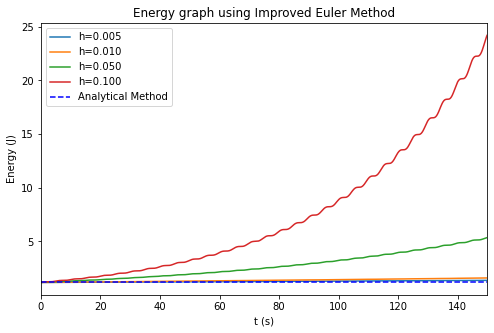

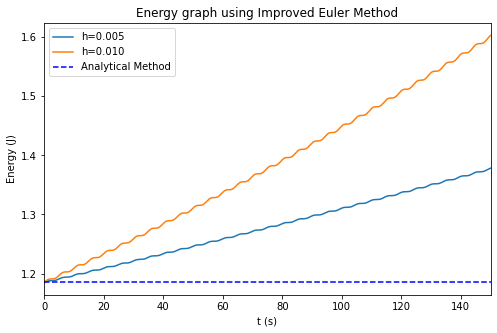

In [16]:
#title of the graph 
title = 'Improved Euler Method'

#function variable to conveniently change the numerical method used in the graph 
function = improvedEuler_Method

#A range of time step h
h = [0.005, 0.01, 0.05, 0.1]
plot_energy(function, 'Energy graph using ' + title)

#Plot graphs for smaller h values (To see it in more detail)
h = [0.005, 0.01]
plot_energy(function, 'Energy graph using ' + title)

Similar to Euler's method that the total energy of the system with no damping calculated using this numerical method will keep increasing. 

This would also explain why displacement keeps increasing as time limit, T, increases in the previous graphs for small b.

For small h, the energy of the system would increase more or less linearly. However, for bigger h, the increase in energy would fluctuate, however, it can be seen that the energy increase averages out and increases exponentially.

This method, similar to previous Euler method, is not every accurate for bigger time limit, T. Moreover, to use this method, time step h has to be small and preferable relatively big value of b as shown in graphs above.

#### Verlets method 

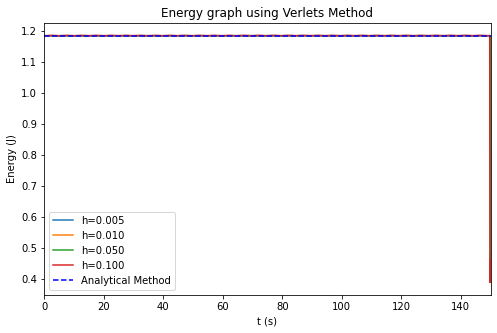

In [17]:
#title of the graph 
title = 'Verlets Method'

#function variable to conveniently change the numerical method used in the graph 
function = Verlets_Method

#A range of time step h
h = [0.005, 0.01, 0.05, 0.1]
plot_energy(function, 'Energy graph using ' + title)




This shows this method becomes more and more accurate with smaller h value. This also shows that Verlet's method is very accurate in solving the problem since the total energy of the system with no damping remains constant equal to the analytical solution for very small h.

This would explain why this method would give accurate solutions compared to the analytical solutions for a range of b and h.

Furthermore, Verlet method is more accurate compared to other methods as it has smaller truncation error (Quartic in h).

#### Euler-Cromer method 

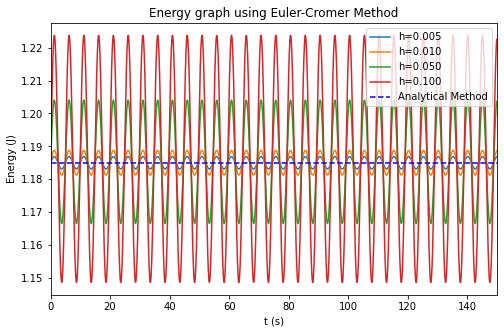

In [18]:
#title of the graph 
title = 'Euler-Cromer Method'

#function variable to conveniently change the numerical method used in the graph 
function = EulerCromer_Method

#A range of time step h
h = [0.005, 0.01, 0.05, 0.1]
plot_energy(function, 'Energy graph using ' + title)


As shown above that Euler-Cromer method would cause the total energy of the system with no damping to fluctuate. However, this fluctuation would averages out over one oscillation to equal to the analytical solution. Thus, the total average energy of the system using this method will remain constant equal to the analytical solution. Hence, Euler-Cromer method is called Symplectic Integrator.

This would explain why using this method would give accurate solutions for small damping (small b) or no damping (b=0) since in these scenarios the total energy of the system is conserved.

This method is accurate to calculate the energy of the system and to find displacement of oscillatiion when there is no damping or when damping is small enough that energy is conserved over the time period. 

## Objective 4

For the best method, plot solutions for the damping b equals to 

a) b = 0.5 * b_cr

b) b = b_cr

c) b = 2 * b_cr

As seen in previous objectives, the Verlet's method is the most accurate method, using improved Euler method as starting method (step value (h) must remain small to increase accuracy). 

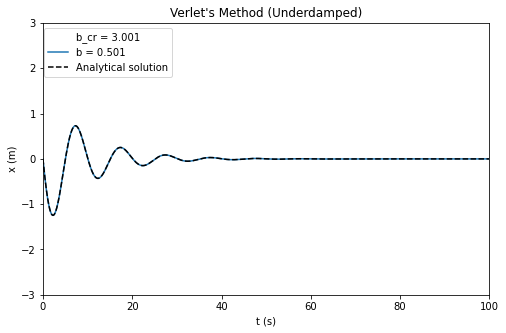

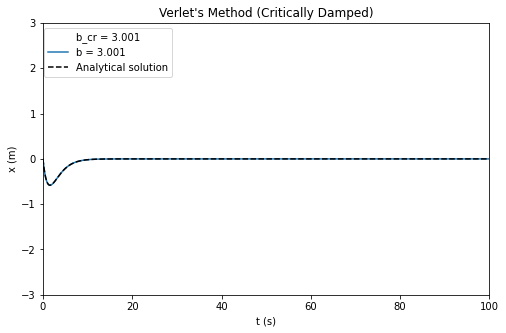

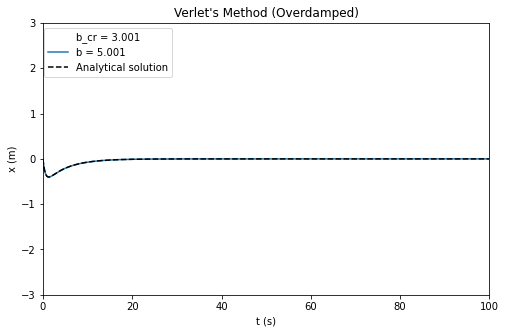

In [19]:
#Define new parameter for B according to the objective
B = [b_cr - 2.5, b_cr, b_cr + 2]

#Time limit, number of steps and time array
T = 100
nsteps = int(T/H)
time = np.arange(0, T, H)

#Title variable for the graphs (according to the numerical method used)
title = 'Verlet\'s Method'
function = Verlets_Method
#plot graphs according for the values of b (Using Euler Method)
for b in B:
    if b == b_cr:
        plot_damping(function, analytic_critical, title + ' (Critically Damped)')
    if b < b_cr: 
        plot_damping(function, Analytic, title + ' (Underdamped)')
    if b > b_cr:
        plot_damping(function, Analytic, title + ' (Overdamped)')



Verlet's method gives accurate enough solutions relative to the analytical solutions

For: 
1. b = 2*b_cr: The system is overdamped which means that the system will slowly return to equilibrium point 
2. b = b_cr: The system is critically damped which means that the system will return to equilibrium point at the fastest possible time 
3. b = 0.5*b_cr: The system is underdamped which means that the system is allowed to oscillate about its equilibrium point until it loses all of its energy due to the damping and return to its equilibrium point

## Objective 5

For the best method, explore the sudden applicaiton of an external force after a few oscillation periods:
1. External force has same or opposite sign to the instantaneous velocity 
2. Force is applied in different parts of a cycle

To calculate the instantaneous acceleration of the system at time t, 

a = -(k/m)x - (b/m)x' + F/m

Thus, for improved Euler method, calculation method is the same except that

a = -(k/m) * x[h] - (b/m) * v[h] + F[h]/m

Specifically for Verlet's method, after some algebra, 

x[h+1] = A * x[h] + B * x[h-1] + (2 * steps^2) * F[h] / D

D = 2 * m + b * steps, 
A = (2/D) * (2 * m - k * steps^2), 
B = (b * steps - 2 * m) / D


For numerical method, it is impossible to input a single value of force at a particular time t. This is because a single value of force would cause the integration used in numerical method to fail. Thus, it is assumed that the force applied to the motion follows the Gaussian distribution. 

Gaussian distribution:

f(x) = exp{-[(x-mu)/sigma]^2 / 2} / (sigma * sqrt(2pi))

where,
1. mu: Mean
2. sigma: Standard deviation

To use this distribution to represent the force, 

F(t) = f(x) * F0

where, 
1. F0: Amount of force applied
2. sigma = 1/sqrt(2pi)
    
    This is so that the highest value of f(x) = 1 for all x 
3. mu -> t

    Thus, mu represents the time when the force is applied on the motion

In [20]:
#Integration function using the improved Euler Method (Higher accuracy)
def improvedEuler_forced(int_condition, nsteps, steps):
    #int_conditions: Array containing the values (float) of initial conditions of x and v
    #int_conditions = [initial x (m), initial v (m/s)]
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = int_condition[0]
    v[0] = int_condition[1]
    
    #Calculate the value of all x and v
    for h in range(nsteps-1):
        # Calculate the acceleration at step h (in m/s)
        a = -(k/m) * x[h] - (b/m) * v[h] + force_array[h]/m
        # For each configuration at step h, calculate x (in m) and v (in m/s) for the later step h+1
        x[h+1] = x[h] + v[h] * steps + (steps**2/2) * a
        v[h+1] = v[h] + a * steps
    
    return x

#Integration function using the Verlet's Method
def Verlets_forced(int_condition, nsteps, steps):
    #int_conditions: Array containing the values (float) of initial conditions of x and v
    #int_conditions = [initial x (m), initial v (m/s)]
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = int_condition[0]
    
    #Calculate the x[1] using other method 
    #verlets_function: variable that stores the starting method function 
    x1 = improvedEuler_forced(int_condition, 2, steps)
    
    x[1] = x1[1]
    v[0] = int_condition[1]
    
    D = 2 * m + b * steps
    A = (2/D) * (2 * m - k * steps**2)
    B = (b * steps - 2 * m) / D
    
    #Calculate the value of all x and v
    for h in np.arange(1, nsteps-1):
        # For each configuration at step h, calculate x (in m) the later step h+1
        x[h+1] = A * x[h] + B * x[h-1] + (2 * steps**2) * force_array[h] / D
    
    return x

#Normal distribution
def normal(x, t):
    #t: The time when external force is applied on the oscillation
    #Standard deviation of the distribution 
    sigma = 1/np.sqrt(2*np.pi)
    return np.exp(-np.power((x-t)/sigma, 2) / 2) 
 


In [21]:
#Time limit, number of steps and time array
T = 100
nsteps = int(T/H)
time = np.arange(0, T, H)

#b value
b = 0.1
#External force applied
force = [5, 5, -5, -5] #N
#Time when the force is applied
t_array = [0, 10, 0, 5] #s


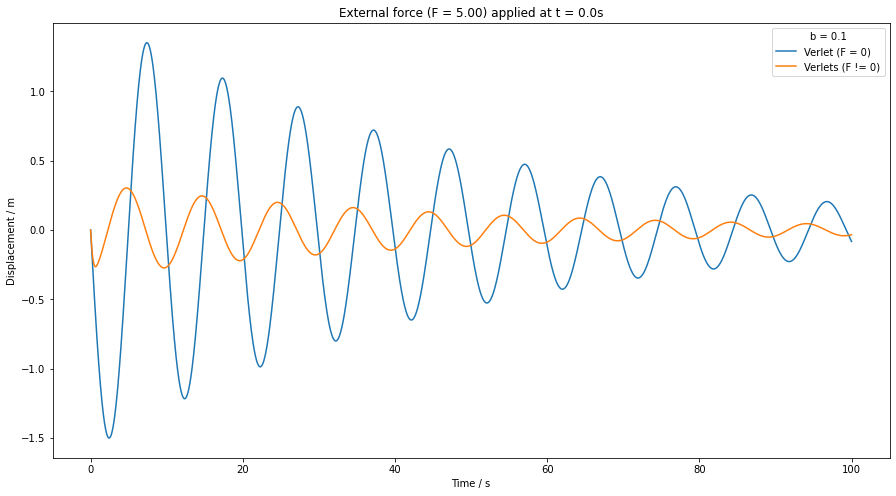

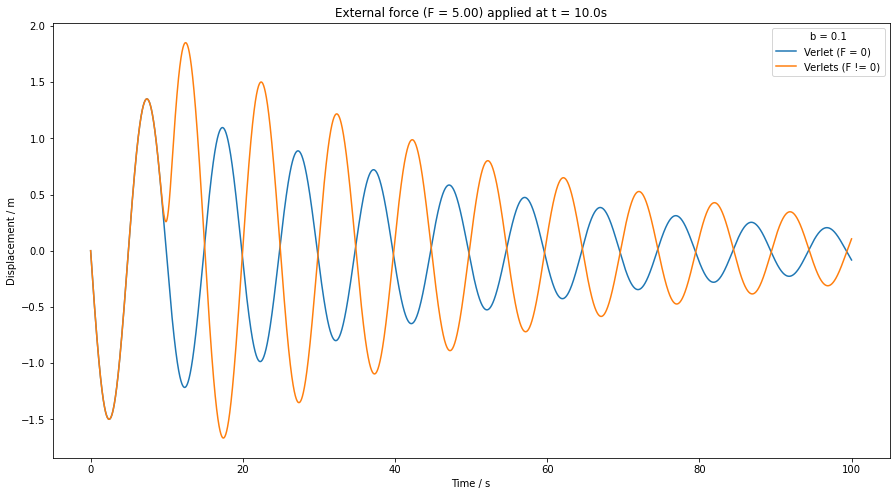

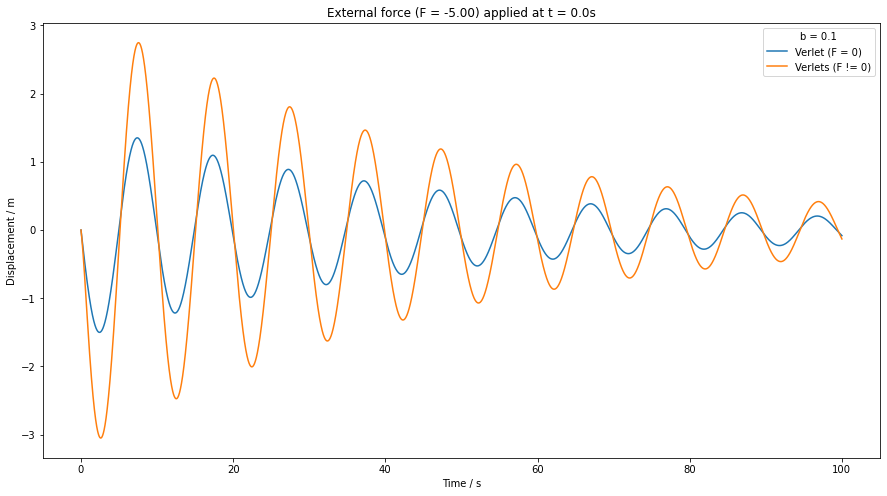

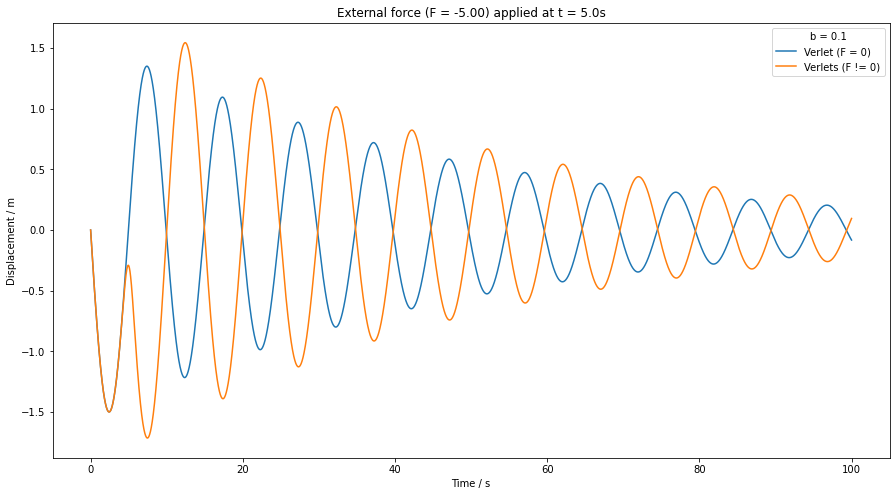

In [22]:
#Numerical solutions when no force is applied (As a comparison)
(x, v) = Verlets_Method(int_condition, nsteps, H)

#For every value of F0 in array force 
for F0, t in zip(force, t_array):
    #Calculate the external force at time t
    force_array = F0 * normal(time, t)
    
    #Plot graph
    plt.rcParams["figure.figsize"] = (15, 8)
    plt.plot(time, x, label='Verlet (F = 0)')
    plt.plot(time,  Verlets_forced(int_condition, nsteps, H), label='Verlets (F != 0)')

    #Title, legend, x and y label
    plt.title('External force (F = {:2.2f}) applied at t = {:2.1f}s'.format(F0, t))
    plt.legend(loc=1, bbox_to_anchor=(1,1), title='b = {:2.1f}'.format(b))
    plt.xlabel('Time / s')
    plt.ylabel('Displacement / m')
    plt.show()



As seen from the plots above, when external force is applied, the amplitude of the resulting motion is the superposition of the displacement caused by the force and its 'natural' displacement. Thus, when the force has the same sign as the instantaneous velocity, the amplitude is higher than original. However, when the force has the opposite sign as the instantaneous velocity, the value of resulting amplitude will depend on the time the force is applied to. 

Furthermore, when force has same sign as instantaneous velocity, the resulting motion will be in phase with the original oscillation. However, when the force has opposite sign as instantaneous velocity, the resulting motion will experience a phase shift. This shift depends on the time when the force is applied on the oscillation.

Phase shift can be calculated by, 

Phase shift [radian] = 2pi * time difference between waves / wave period

## Objective 6 

For best method, show the effect of forced oscillations with a sinusoidal external force with frequency different from the undamped natural frequency 

Best method used: Verlet's method

mx" + bx' + kx = F 

This equation is inhomogeneous ODE, thus, the solution is 

x(t) = Complementary function (C.F) + Particular Integer (P.I)


1. Expression for C.F:
    1. Forced, heavy damping:
        
        exp(-Pt) * [Aexp(Qt) + B(-Qt)] 
        
        where, 
        1. P = gamma / 2
        2. Q = sqrt(P^2 - w0^2)
        3. 2A = {v0 + P[x0 - R(w0^2 - 2^2)] - R * gamma * w^2}/Q + x0 - R(w0^2 - w^2)
        4. B = x0 - A - R(w0^2 - w^2)
        5. R = (F0/m)/[(w0^2 - w^2) + (gamma w)^2]
        6. S = [(w0^2 - w^2)cos(wt) + gamma * wsin(wt)]
        7. Natural frequency, w0 
        8. Driving frequency, w = 2pi f 
        
    2. Forced, light damping:
    
        exp(-Pt) * [Aexp(iqt) + B(-iqt)] 
        
        where, 
        1. q = sqrt(w0^2 - P^2)
        2. 2A = {v0 + P[x0 - R(w0^2 - 2^2)] - R * gamma * w^2}/iq + x0 - R(w0^2 - w^2)
        3. B = x0 - A - R(w0^2 - w^2)
        
    3. Forced, critically damped:
    
        exp(-Pt) * (A + Bt) 
        
        where, 
        A = x0 - R(w0^2 - 2^2)
        B = v0 - A*P - R * gamma * w^2


For external force, F = F0 * cos(omega * t)

Expression for P.I:

R * S 

Overtime, the C.F would vanish due to the damping. This will cause the oscillator to enter the steady state which can be descibed by the P.I expression. 

Define parameters and new analytical and numerical functions to include external force calculation

In [23]:
#Analytical function of displacement when sinusoidal external force (F=F0 * cos(wt)) is applied 
def analytical_forced(time):
    #Defining omega 
    w0 = omega(f0)
    w = omega(f)
    
    #Let gamma be
    gamma = b/m
                                          
    #Let,
    P = gamma/2
    R = (F0/m) / ((np.power(w0**2 - w**2, 2) + (gamma * w)**2))
    S = (w0**2 - w**2) * np.cos(w * time) + gamma * w * np.sin(w * time)
     
    #Initial condition
    x0 = int_condition[0]
    v0 = int_condition[1]
    
    #When the motion is critically damped (b = b_cr)
    if b == b_cr:
        #Defining constants of the equation (Determined by initial conditions)
        A = x0 - R * (w0**2 - w**2)
        B = v0 + A * P - R * gamma * w**2
        
        #Equation of motion
        X = np.exp(-P * time) * (A + B*time) + R * S
      
    #When the motion is underdamped (b < b_cr)
    if b < b_cr:
        Q = np.sqrt(w0**2 - P**2)
        #Defining constants of the equation (Determined by initial conditions)
        A1 = v0 + P * (x0 - R * (w0**2 - w**2)) - R * gamma * w**2
        A2 = x0 - R * (w0**2 - w**2)
        A = ((A1 / (1j * Q)) + A2) / 2
        B = x0 - A - R * (w0**2 - w**2)
    
        #Equation of motion 
        X = np.exp(-P * time) * (A*np.exp(1j * Q * time) + B*np.exp(-1j * Q * time)) + R * S
    
    #When the motion is overdamped (b > b_cr)
    if b > b_cr:
        #Let,
        Q = np.sqrt(P**2 - w0**2)
        #Defining constants of the equation (Determined by initial conditions)
        A1 = v0 + P * (x0 - R * (w0**2 - w**2)) - R * gamma * w**2
        A2 = x0 - R * (w0**2 - w**2)
        A = ((A1 / Q) + A2) / 2
        B = x0 - A - R * (w0**2 - w**2)
    
        #Equation of motion 
        X = np.exp(-P * time) * (A*np.exp(Q * time) + B*np.exp(-Q * time)) + R * S
    
    return X.real
                                        
#Function of sinusoidal force
def force(int_force, frequency, t):
    return int_force * np.cos(omega(frequency) * t)

#Function of omega 
def omega(f):
    return 2 * np.pi * f


In [24]:
#Varying the external force value according to their frequency to be able to see the plots more clearly
#External force
Force = np.array([1, 1, 1]) #N

#Natural frequency
f0 = (1/ (2*np.pi)) * np.sqrt(k/m) #Hz

#Frequency of external force 
frequency = [f0 - 0.1, f0 + 0.001, f0 + 0.1] #Hz


Light damping

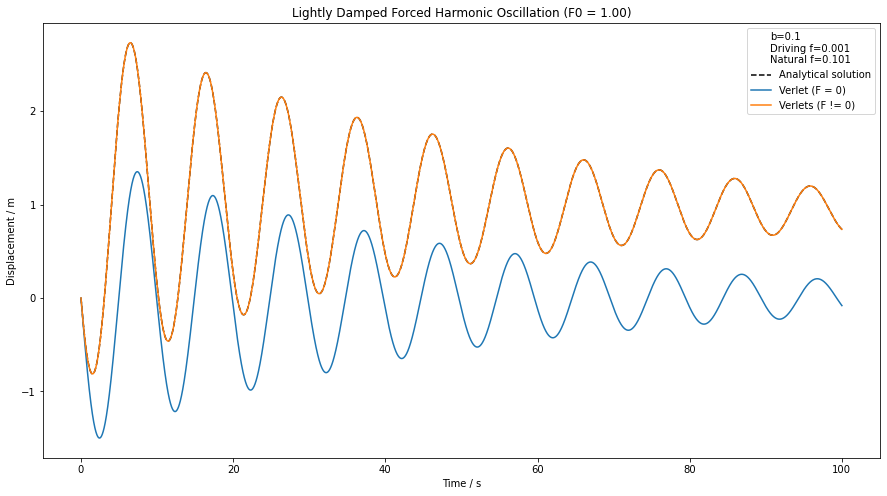

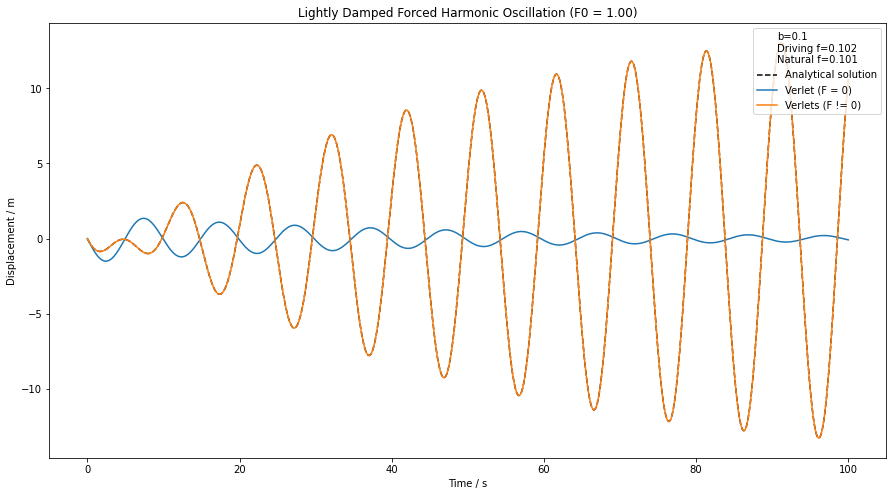

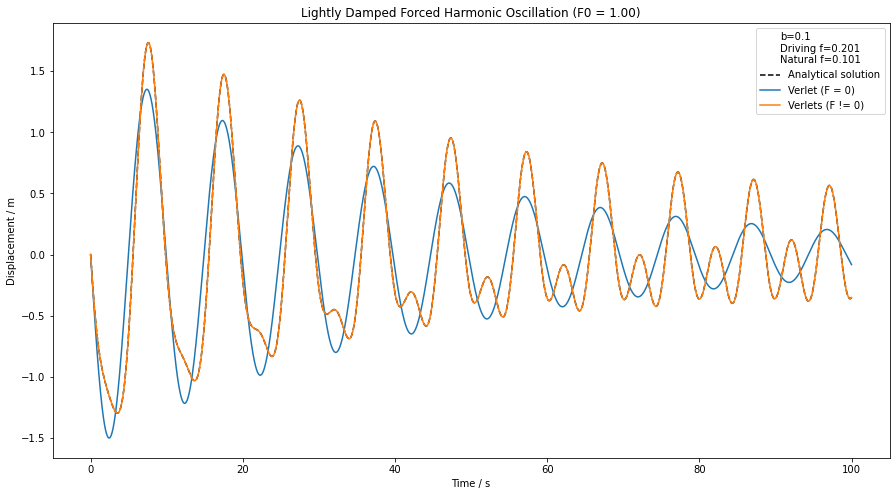

In [25]:
#Light damping value of b 
b = 0.1 #kg/s

#Numerical solutions when no force is applied (As a comparison)
(x, v) = Verlets_Method(int_condition, nsteps, H)

#Plot all the graphs of x vs. t for forced oscillation for different force and frequency
for i in range(len(frequency)):
    #Frequency
    f = frequency[i]
    #Amplitude of driving force
    F0 = Force[i]
    #Calculate the external force for time t
    force_array = force(F0, f, time)
    
    #Plot graph
    plt.rcParams["figure.figsize"] = (15, 8)
    plt.plot(time,analytical_forced(time), 'k--', label='Analytical solution')
    plt.plot(time, x, label='Verlet (F = 0)')
    plt.plot(time,  Verlets_forced(int_condition, nsteps, H), label='Verlets (F != 0)')

    #Title, legend, x and y label
    plt.title('Lightly Damped Forced Harmonic Oscillation (F0 = {:2.2f})'.format(F0))
    plt.legend(loc=1, bbox_to_anchor=(1,1), title='b={:2.1f}\nDriving f={:3.3f}\nNatural f={:3.3f}'.format(b, f, f0))
    plt.xlabel('Time / s')
    plt.ylabel('Displacement / m')
    plt.show()
    




Heavy Damping

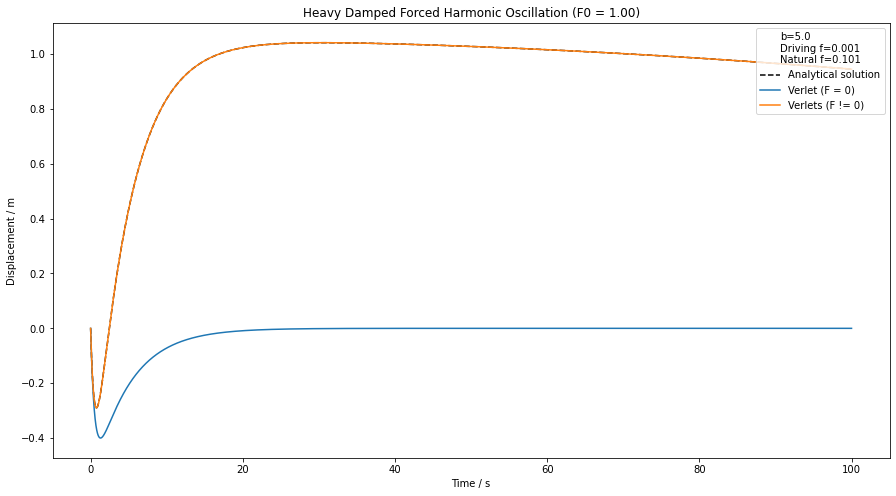

In [26]:
#Heavy damping b value
b = b_cr + 2 #kg/s
#Frequency of driving force
f = f0 - 0.1 #Hz
#Amplitude of driving force
F0 = 1 #N
#Calculate the driving force for time t
force_array = force(F0, f, time)
#Numerical solutions when no force is applied (As a comparison)
(x, v) = Verlets_Method(int_condition, nsteps, H)
    
#Plot graph
plt.rcParams["figure.figsize"] = (15, 8)
plt.plot(time,analytical_forced(time), 'k--', label='Analytical solution')
plt.plot(time, x, label='Verlet (F = 0)')
plt.plot(time,  Verlets_forced(int_condition, nsteps, H), label='Verlets (F != 0)')

#Title, legend, x and y label
plt.title('Heavy Damped Forced Harmonic Oscillation (F0 = {:2.2f})'.format(F0))
plt.legend(loc=1, bbox_to_anchor=(1,1), title='b={:2.1f}\nDriving f={:3.3f}\nNatural f={:3.3f}'.format(b, f, f0))
plt.xlabel('Time / s')
plt.ylabel('Displacement / m')
plt.show()

Critically damped

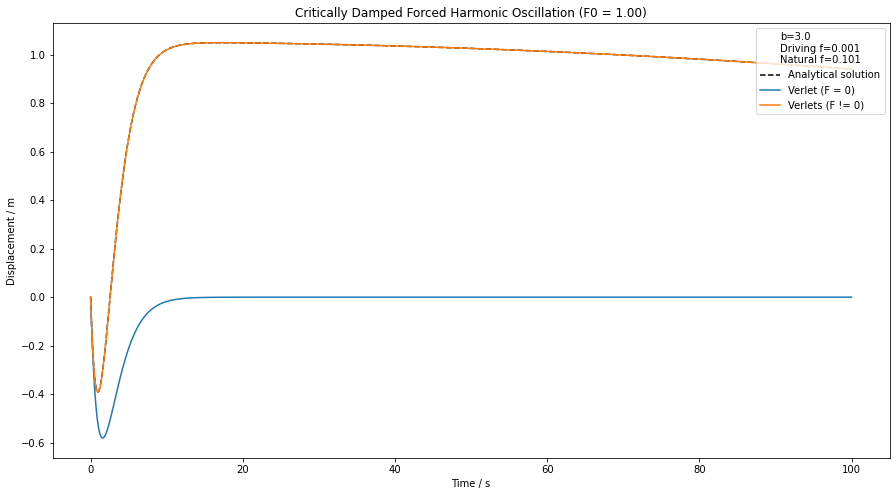

In [27]:
#Critical damping b value
b = b_cr #kg/s
#Frequency of driving force
f = f0 - 0.1 #Hz
#Amplitude of driving force
F0 = 1 #N
#Calculate the driving force for time t
force_array = force(F0, f, time)
#Numerical solutions when no force is applied (As a comparison)
(x, v) = Verlets_Method(int_condition, nsteps, H)
    
#Plot graph
plt.rcParams["figure.figsize"] = (15, 8)
plt.plot(time,analytical_forced(time), 'k--', label='Analytical solution')
plt.plot(time, x, label='Verlet (F = 0)')
plt.plot(time,  Verlets_forced(int_condition, nsteps, H), label='Verlets (F != 0)')

#Title, legend, x and y label
plt.title('Critically Damped Forced Harmonic Oscillation (F0 = {:2.2f})'.format(F0))
plt.legend(loc=1, bbox_to_anchor=(1,1), title='b={:2.1f}\nDriving f={:3.3f}\nNatural f={:3.3f}'.format(b, f, f0))
plt.xlabel('Time / s')
plt.ylabel('Displacement / m')
plt.show()

As can be seen from the plots above that the Verlet's Method produce the same solutions compared to the analytical solutions. This method works for light, heavy and critical damping motions and for different driving frequency and initial driving forces. It shows the shift in phase and the resonance effect which causes the amplitude to keep increasing. Thus, this method is very accurate to calculate the motion of forced harmonic oscillation. 

## Objective 7

Using best numerical method (Verlet's Method), investigate resonance. 

Calculate and plot the amplitude of oscillations as a function of frequency for a range of frequencies above and below the natural frequency of the system

To get the values of amplitude of forced oscillation for different frequencies:
1. Calculate the displacement of forced oscillation using the Verlet's method
2. Take the highest value in the array (This is equal to the amplitude of the motion)
3. Plot the amplitude v. frequency graph

This method will be more accurate to predict the behaviour of the amplitude of forced oscillation against frequency when more driving frequencies are used. 

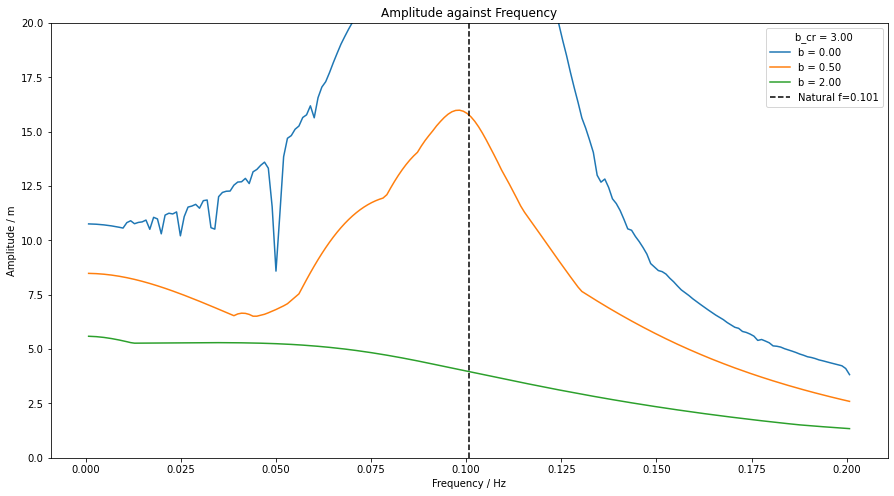

In [28]:
#Time limit, number of steps and time array
H = 0.05
T = 100
nsteps = int(T/H)
time = np.arange(0, T, H) #s

#b values
B = [0, b_cr - 2.5, b_cr -1] #kg/s

#Frequency 
fmin = f0 - 0.1  #Minimum frequency (Hz)
fmax = f0 + 0.1  #Maximum frequency (Hz)
Frequency = np.linspace(fmin, fmax, 200)

#Plot graph
plt.rcParams["figure.figsize"] = (15, 8)

#Plot amplitude v. frequency for different values of b
for b in B:
    #Array to contain the calculated amplitude 
    amplitude = np.zeros(len(Frequency))

    #Calculate the amplitude for different frequency 
    for i in range(len(Frequency)):
        force_array = force(5, Frequency[i], time)
        amplitude[i] = np.amax(Verlets_forced(int_condition, nsteps, H))
    
    #Plot graph
    plt.plot(Frequency,  amplitude, label='b = {:2.2f}'.format(b))
    
#Setting the range displayed 
plt.ylim(0, 20)
#Line to mark the natural frequency
plt.axvline(x = f0, color = 'k', linestyle = '--', label='Natural f={:3.3f}'.format(f0))

#Title, legend, x and y label
plt.title('Amplitude against Frequency')
plt.legend(loc=1, bbox_to_anchor=(1,1), title='b_cr = {:2.2f}'.format(b_cr))
plt.xlabel('Frequency / Hz')
plt.ylabel('Amplitude / m')
plt.show()

As seen from the plot above, when the driving frequency tends towards the natural frequency, the resultant amplitude will get higher. 

Furthermore, the smaller the damping is the higher the resultant amplitude will be. The maximum value of the resultant force will depend on how much force is applied to the oscillation. Moreover, for no damping motion, the resultant can keep getting higher and higher when there is no time limit applied to it. This is because the motion will keep absorbing more and more energy from the external force without any loss of energy from the damping effect. 

Lastly, as the damping constant gets bigger, the peak of the amplitdue will shift leftwards away from the natural frequency. This means that the bigger the damping, the biggest transfer of energy from the external force to the oscillatory motion happen at a frequency less than the natural frequency. 

Smaller H value is used to reduce the time taken for the computer to do the calculations. To achieve this objective, numerical integrations have to be repeated numerous times to measure the change in amplitude of the motion for a range of driving frequencies. Thus, reducing the step value of the numerical integration would reduce the time taken greatly. 

## Objective 8 

Measuring the accuracy of Verlet's method for a range of H values by calculating the round-off error. 

Verlet's method arounds the idea of centered derivation 

x'(t) = lim(h->0) [x(t+h) - x(t-h)] / 2

Thus, the uncertainty of h can be calculated by

delta h = x'(t) - {[x(t+h) - x(t-h)]/2h} 

Therefore, by varying the value of H, the best value of H that gives the most accurate solutions using Verlet's method can be found. 

The function used for this test is 

x(t) = exp(-bt/2m) * (Aexp(iwt) + Bexp(-iwt))

[Same as the analytic equation used previously with no driving forced]

In [32]:
#Derivative of analytical equation
def derivative_x(int_condition, t):
    # Constants
    x0 = int_condition[0]
    v0 = int_condition[1]
    #A and B depends on initial condition
    A = (b / (2*1j*cmath.sqrt(4*k*m-b**2)) + 1/2)*x0 + (v0*m) / (cmath.sqrt(4*k*m - b**2) * 1j) 
    B = x0-A
    #Gamma and omega values 
    gamma = b/m
    w = np.sqrt(omega(f0)**2 - (gamma/2)**2)
    
    #Breaking down the equation
    temp1 = -(gamma/2) * np.exp((-gamma * t)/2) * (A*np.exp(1j*w*t) + B*np.exp(-1j*w*t))
    temp2 = np.exp((-gamma * t)/2) * (A*1j*w*np.exp(1j*w*t) - B*1j*w*np.exp(-1j*w*t))
    
    return (temp1 + temp2).real

#Calculate the uncertainty of Verlet method for a range of h values
def delta(t, h):
    #Parameters of Verlet's Method
    D = 2 * m + b * h
    A = (2/D) * (2 * m - k * h**2)
    B = (b * h - 2 * m) / D
    
    #Breaking down the equations
    temp = Analytic(int_condition, t + h) - Analytic(int_condition, t - h)
    
    return (derivative_x(int_condition, t) - temp/(2*h)).real

In [33]:
#Global variables
#Size of array
SIZE = 16
#t value used 
TIME = 1


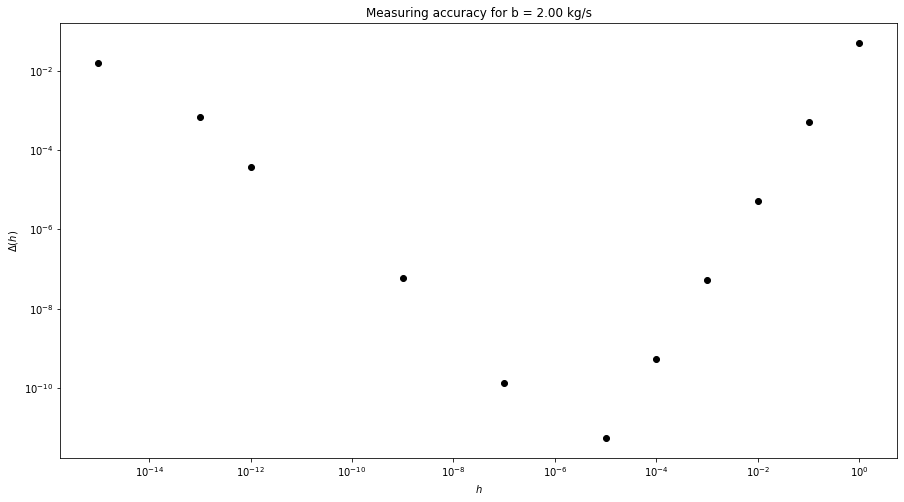

In [34]:
#Arrays to store the H values and its errors
H_val = np.zeros(SIZE)
err = np.zeros(SIZE)

#Loop to calculate the error of a range of H values
for i in range(SIZE):
    H_val[i] = 1/(10**i)
    err[i] = delta(TIME, H_val[i])
    
# plotting the outcome
plt.loglog(H_val, err, 'ko')
plt.xlabel("$h$")
plt.ylabel("$\Delta(h)$")
plt.title('Measuring accuracy for b = {:3.2f} kg/s'.format(b))
plt.show()

This show that the best value of H is about 10^-5. This value might change depending on the value of b (Since the values of k and m are fixed for this project). 

For a lower value of H, the computing power is not powerful enough to give an accurate solutions which is why the uncertainty start to increase for lower H. 
